In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

Compiling complete dataframe

In [3]:
df_tfidf = pd.read_csv("df_tfidf_v2.csv")

In [5]:
df_no_lsa = pd.read_csv("df_final_mlp.csv")

In [6]:
df_no_lsa = df_no_lsa.drop(['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'lsa_5',
 'lsa_6',
 'lsa_7',
 'lsa_8',
 'lsa_9',
 'lsa_10',
 'lsa_11',
 'lsa_12',
 'lsa_13',
 'lsa_14',
 'lsa_15',
 'lsa_16',
 'lsa_17',
 'lsa_18',
 'lsa_19',
 'lsa_20',
 'lsa_21',
 'lsa_22',
 'lsa_23',
 'lsa_24',
 'lsa_25',
 'lsa_26',
 'lsa_27',
 'lsa_28',
 'lsa_29',
 'lsa_30'], axis = 1)

In [7]:
df_no_lsa

,hybrid,indica,sativa,anxiety,anxious,aroused,arthritis,creative,depression,dizzy,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,1,0,0,0,0,0,0,0,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,1,0,0,0,0,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,1,0,0,0,0,1,0,1,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [8]:
df_rf = pd.concat([df_tfidf, df_no_lsa], axis = 1)

In [9]:
df_rf.columns.to_list()

['tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',
 'tfidf_7

In [10]:
df_rf

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


Splitting dependent and independent variables

In [11]:
X = df_rf.drop(['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol'], axis = 1)
y = df_rf[['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol']]

Plotting histograms on target variable

In [12]:
y_array = y.to_numpy()
y_array

array([[0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       [0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       [0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       ...,
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316],
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316],
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316]])

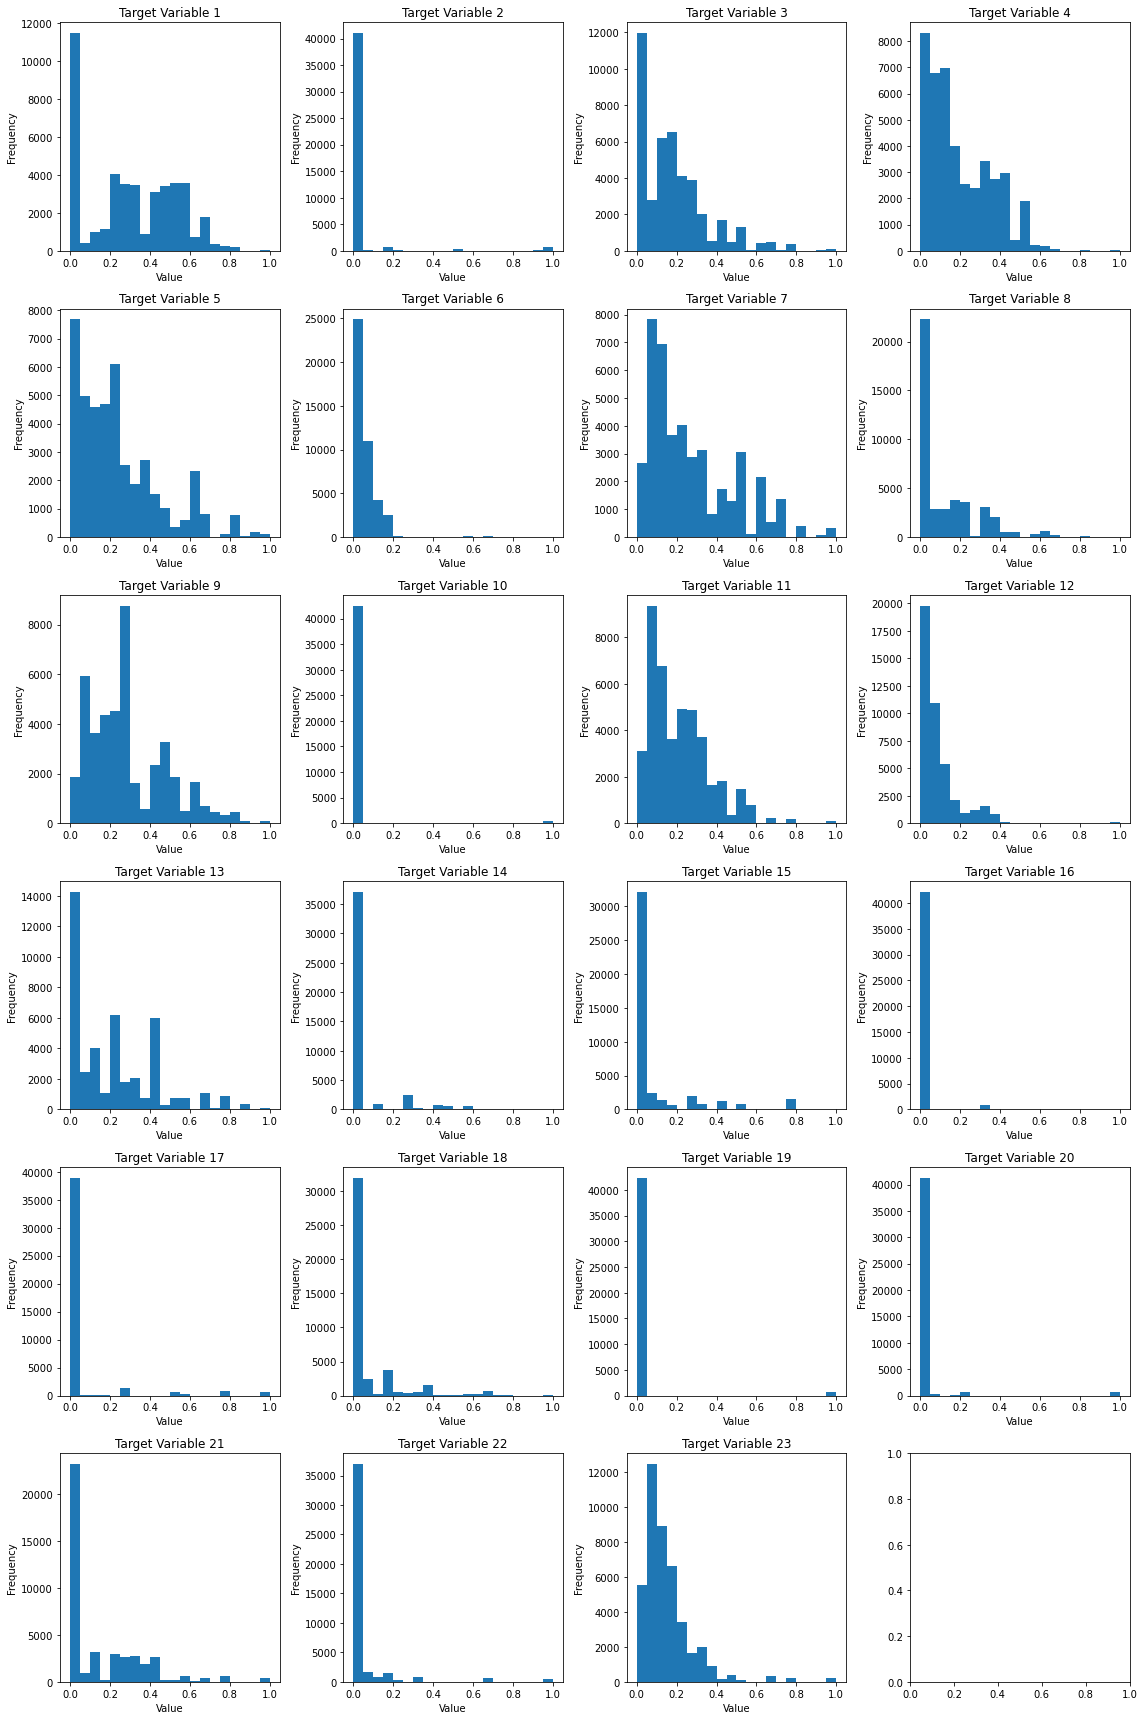

In [10]:
# create a figure with subplots
fig, axs = plt.subplots(6, 4, figsize=(16, 24))

# create histograms for each target variable
for i in range(23):
    row = i // 4
    col = i % 4
    axs[row, col].hist(y_array[:, i], bins=20)
    axs[row, col].set_title('Target Variable {}'.format(i+1))
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Frequency')

# adjust the layout and display the figure
plt.tight_layout()
plt.show()

Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [14]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [15]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)

RandomForestRegressor()

In [16]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [17]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06714928677899984

In [18]:
mean_squared_error(y_val, y_pred_rfreg)

0.01647021570235757

In [19]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.12289658861882517

In [20]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.8975593723658705

In [21]:
#val
r2_score(y_val, y_pred_rfreg)

0.3488610385077457

Residual plots for each target variable

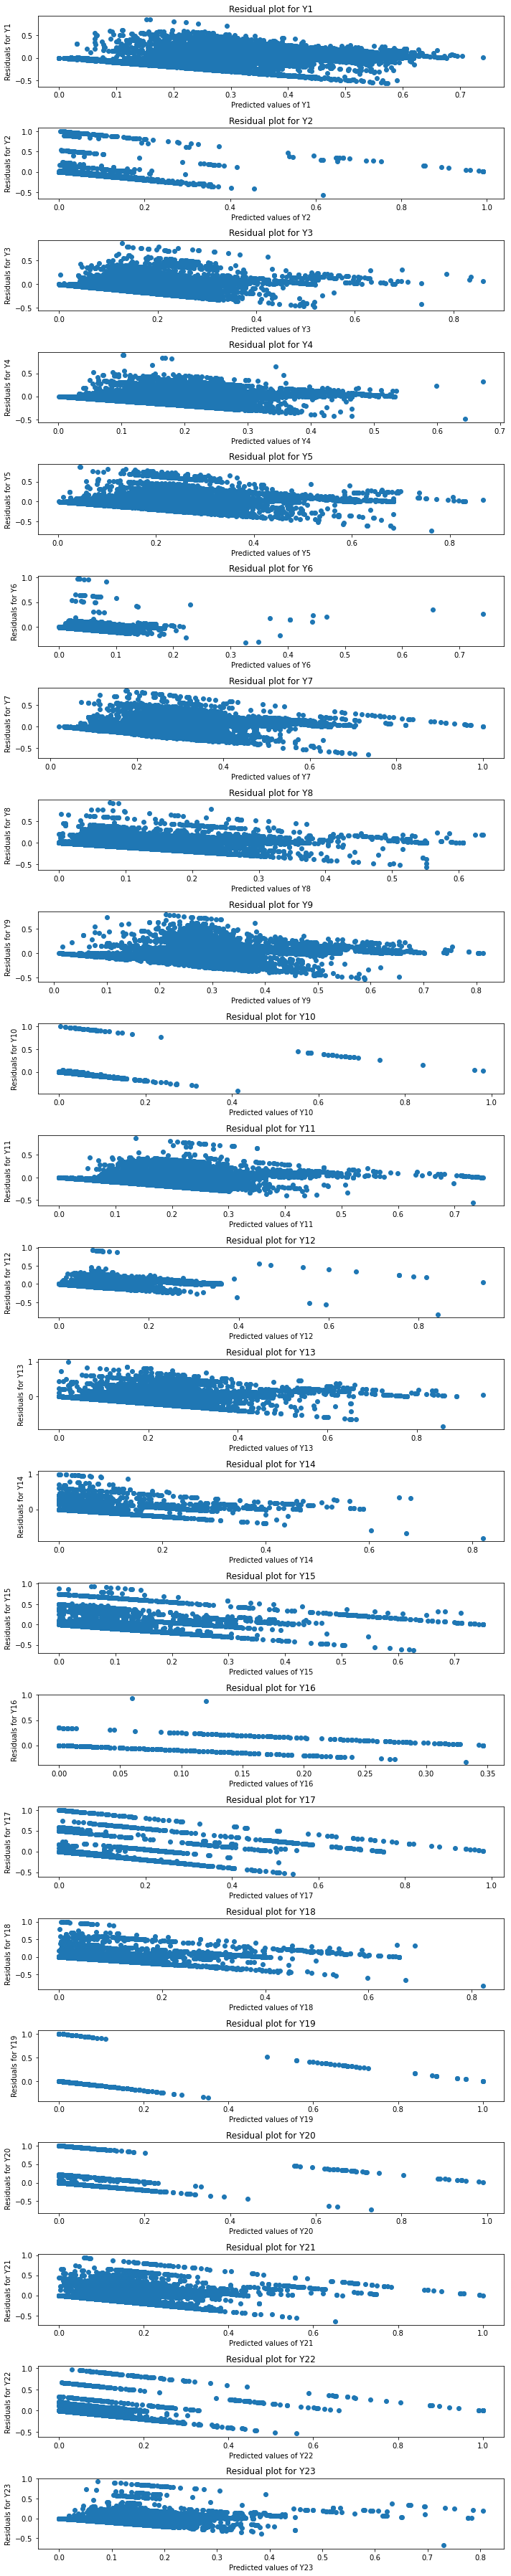

In [21]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_rfreg[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_rfreg[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Feature Selection

In [22]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [23]:
df_feat

,features,score
0,tfidf_0,0.001014
1,tfidf_1,0.001307
2,tfidf_2,0.001045
3,tfidf_3,0.001138
4,tfidf_4,0.001333
...,...,...
464,tree,0.000816
465,tropical,0.001114
466,vanilla,0.012754
467,violet,0.000231


In [24]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [25]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
389,indica,0.026177
329,tfidf_329,0.021424
433,diesel,0.016352
168,tfidf_168,0.016263
441,lemon,0.014319
466,vanilla,0.012754
149,tfidf_149,0.012550
145,tfidf_145,0.012314
345,tfidf_345,0.011883
285,tfidf_285,0.010444


In [26]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

In [27]:
selector.estimator_.feature_importances_

array([1.02057060e-03, 1.34215099e-03, 9.78090963e-04, 1.09025461e-03,
       1.33404300e-03, 3.25995902e-03, 1.76117420e-03, 4.94431298e-03,
       6.72479690e-04, 1.88593200e-03, 9.57334608e-04, 4.63635610e-03,
       9.45591946e-04, 8.72536665e-04, 1.35025877e-03, 5.15800824e-04,
       1.49276995e-03, 1.95786792e-03, 9.15865246e-04, 1.44074741e-03,
       2.55193586e-03, 2.35364491e-03, 1.76236570e-03, 8.78601499e-04,
       9.88595426e-04, 8.51248645e-04, 2.30934495e-03, 1.01496969e-03,
       1.50835921e-03, 1.53636590e-03, 4.83258982e-03, 9.96693637e-04,
       1.78988406e-03, 9.85408221e-04, 2.04508837e-03, 2.89938112e-03,
       1.50919762e-03, 5.07512380e-03, 8.55561686e-04, 1.79895773e-03,
       6.27901650e-04, 1.16882331e-03, 6.09628385e-04, 4.74587245e-03,
       1.02430250e-03, 1.10965876e-03, 2.55625211e-03, 8.36191763e-04,
       2.28866567e-03, 8.57490481e-04, 9.20868409e-04, 9.14846064e-04,
       9.42616629e-04, 2.18131524e-03, 1.70338572e-03, 8.27994708e-04,
      

In [28]:
selector.threshold_

0.0021321961620469083

In [29]:
mask = selector.get_support()

In [30]:
mask

array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False,

In [31]:
selected_features = X.columns[mask]

In [32]:
selected_X = df_rf[selected_features]
selected_X

,tfidf_5,tfidf_7,tfidf_11,tfidf_20,tfidf_21,tfidf_26,tfidf_30,tfidf_35,tfidf_37,tfidf_43,...,mint,orange,pine,pungent,sage,skunk,strawberry,sweet,vanilla,woody
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.14162,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.198545,...,0,0,0,0,0,0,0,1,1,0
3,0.145484,0.0,0.000000,0.0,0.0,0.0,0.0,0.213037,0.00000,0.000000,...,0,0,1,0,0,0,0,0,0,0
4,0.000000,0.0,0.165804,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
42973,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
42974,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
42975,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [39]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_7',
 'tfidf_11',
 'tfidf_20',
 'tfidf_21',
 'tfidf_26',
 'tfidf_30',
 'tfidf_35',
 'tfidf_37',
 'tfidf_43',
 'tfidf_46',
 'tfidf_48',
 'tfidf_53',
 'tfidf_61',
 'tfidf_73',
 'tfidf_78',
 'tfidf_93',
 'tfidf_98',
 'tfidf_101',
 'tfidf_103',
 'tfidf_104',
 'tfidf_117',
 'tfidf_119',
 'tfidf_121',
 'tfidf_123',
 'tfidf_124',
 'tfidf_126',
 'tfidf_128',
 'tfidf_129',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_158',
 'tfidf_161',
 'tfidf_162',
 'tfidf_166',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_178',
 'tfidf_189',
 'tfidf_190',
 'tfidf_199',
 'tfidf_200',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_217',
 'tfidf_230',
 'tfidf_239',
 'tfidf_240',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_267',
 'tfidf_272',
 'tfidf_278',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_289',
 'tfidf_291',
 'tfidf_303',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_319',
 'tfidf_325',
 'tfidf_329',
 'tfidf_336',
 'tfidf_337'

Train test split (after Feature Selection)

In [33]:
import joblib

joblib.dump(selector, "selector_rf_tfidf.pkl")
joblib.dump(selected_X, "selected_X_rf_tfidf.pkl")
joblib.dump(rfreg, "rfreg_tfidf.pkl")

['rfreg_tfidf.pkl']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [35]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [40]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [41]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06767151375640341

In [42]:
mean_squared_error(y_val, y_pred_rfreg)

0.01638401383340695

In [43]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.12256723355700973

In [44]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.8918110729438923

In [45]:
#val
r2_score(y_val, y_pred_rfreg)

0.35163591739436206

Hyperparameter Tuning

In [46]:
parameters = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [47]:
X_train1_subset = X_train1.to_numpy()[:1000, :]
y_train1_subset = y_train1[:1000]

In [48]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [ ]:
rscv.fit(X_train1_subset, y_train1_subset)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [ ]:
rscv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [49]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [50]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [51]:
joblib.dump(rscv, "rscv_rf_tfidf.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_tfidf_best_params.pkl")

['rscv_rf_tfidf_best_params.pkl']

RF (after Hyperparameter Tuning)

In [52]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [53]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06776385036938788

In [54]:
mean_squared_error(y_val, y_pred_rfreg)

0.016425544671768197

In [55]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.1227350982492064

In [56]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.8919509844513938

In [57]:
#val
r2_score(y_val, y_pred_rfreg)

0.3497802463189508

Residual plots after Hyperparameter Tuning

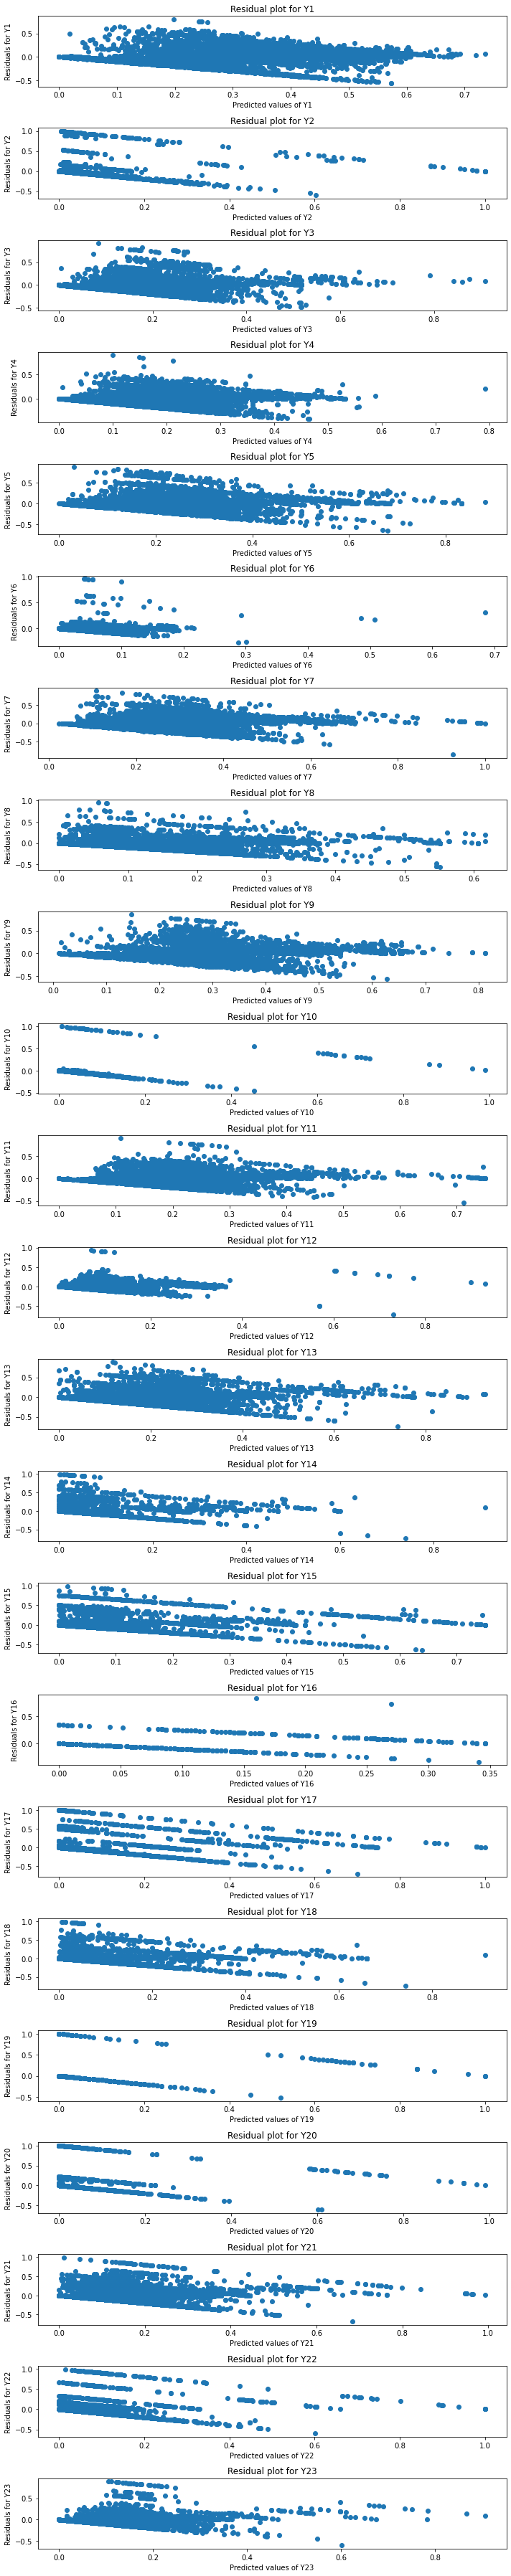

In [58]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_rfreg[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_rfreg[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Predicting model on the test set

In [59]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [60]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.06798437743747554

In [61]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.016614305963054382

In [62]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.12409726279632258

In [63]:
r2_score(y_test, y_pred_rfreg_test)

0.351771478910938

Error analysis

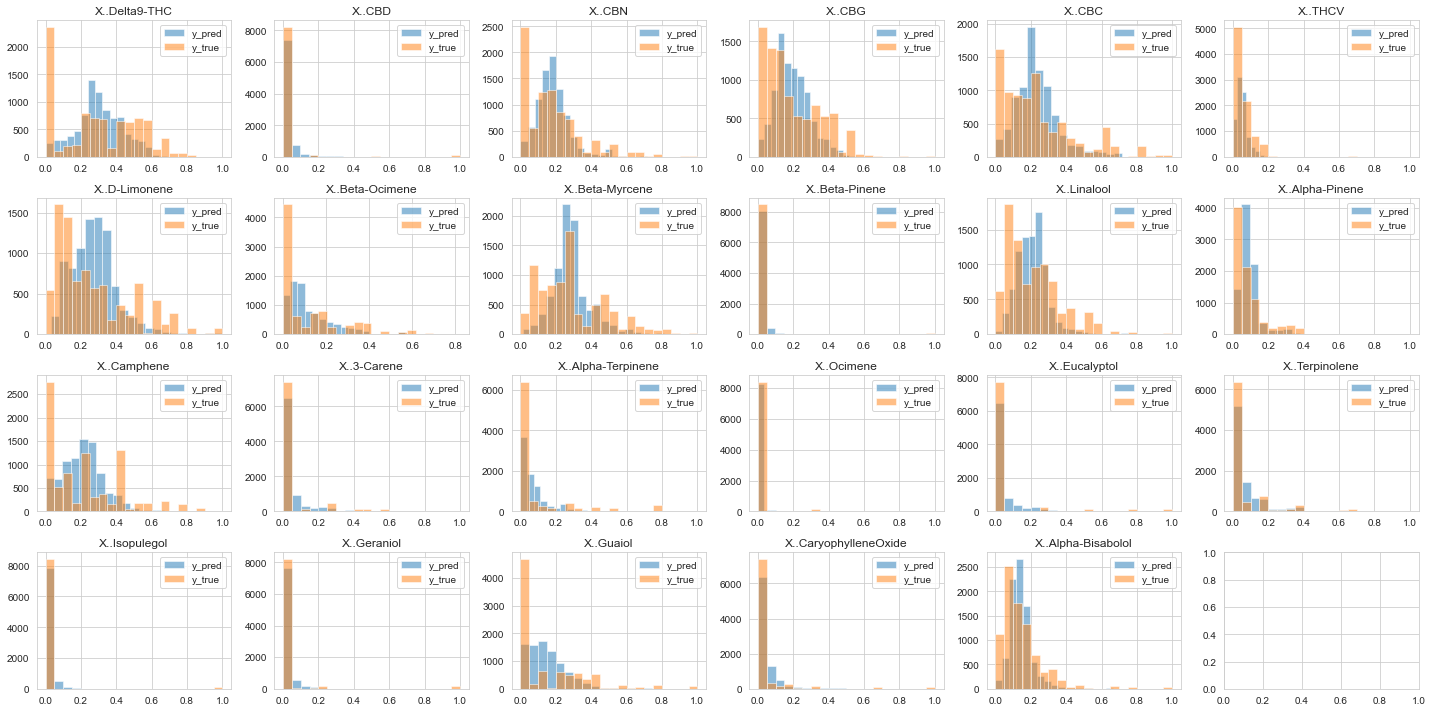

<Figure size 432x288 with 0 Axes>

In [69]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(y_pred_rfreg_test[:, i], alpha=0.5, label='y_pred', bins=20)
    axs[row, col].hist(y_test.iloc[:, i], alpha=0.5, label='y_true', bins=20)
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()
plt.savefig("error_hist_rf_tfidf.png")

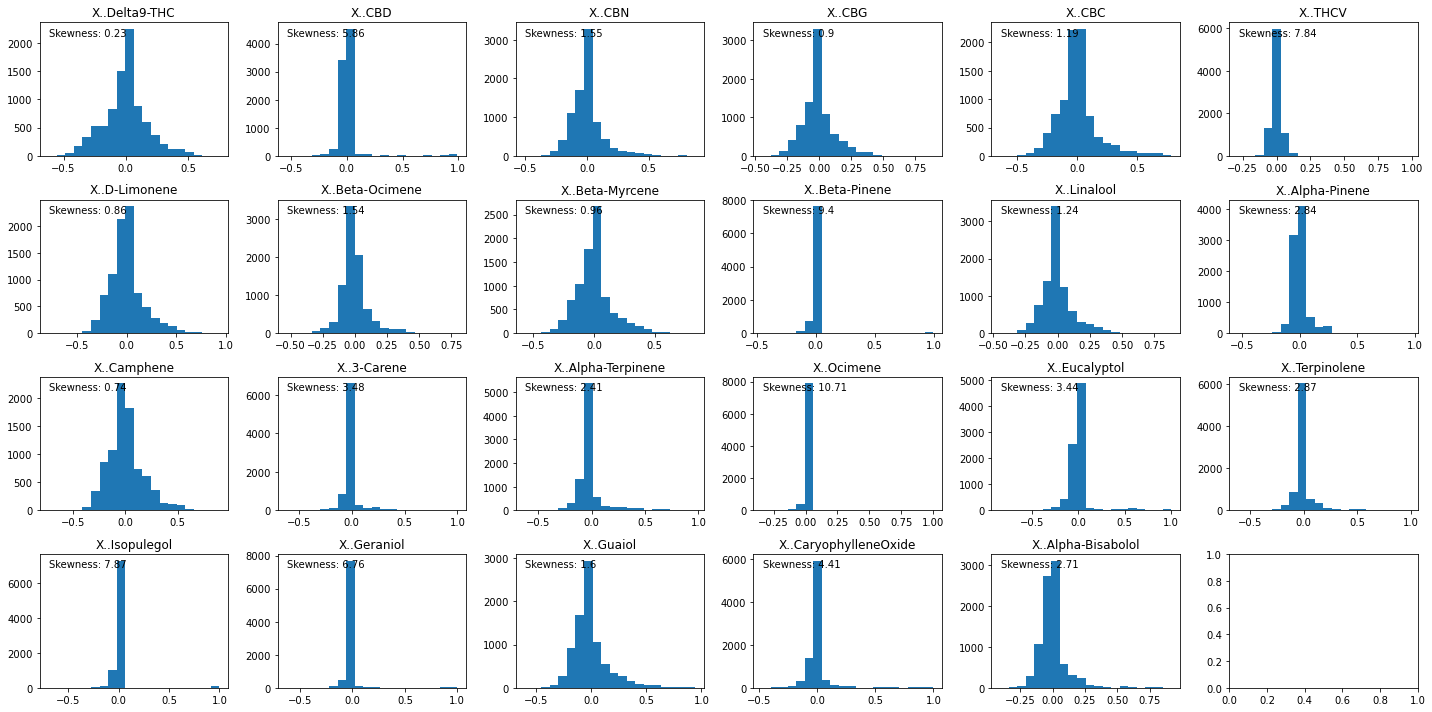

In [65]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
errors = y_test - y_pred_rfreg_test
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(errors.iloc[:, i], bins=20)
    axs[row, col].set_title(column)
    axs[row, col].text(0.05, 0.9, f"Skewness: {np.round(errors.iloc[:, i].skew(), 2)}", transform=axs[row, col].transAxes)

plt.tight_layout()
plt.show()

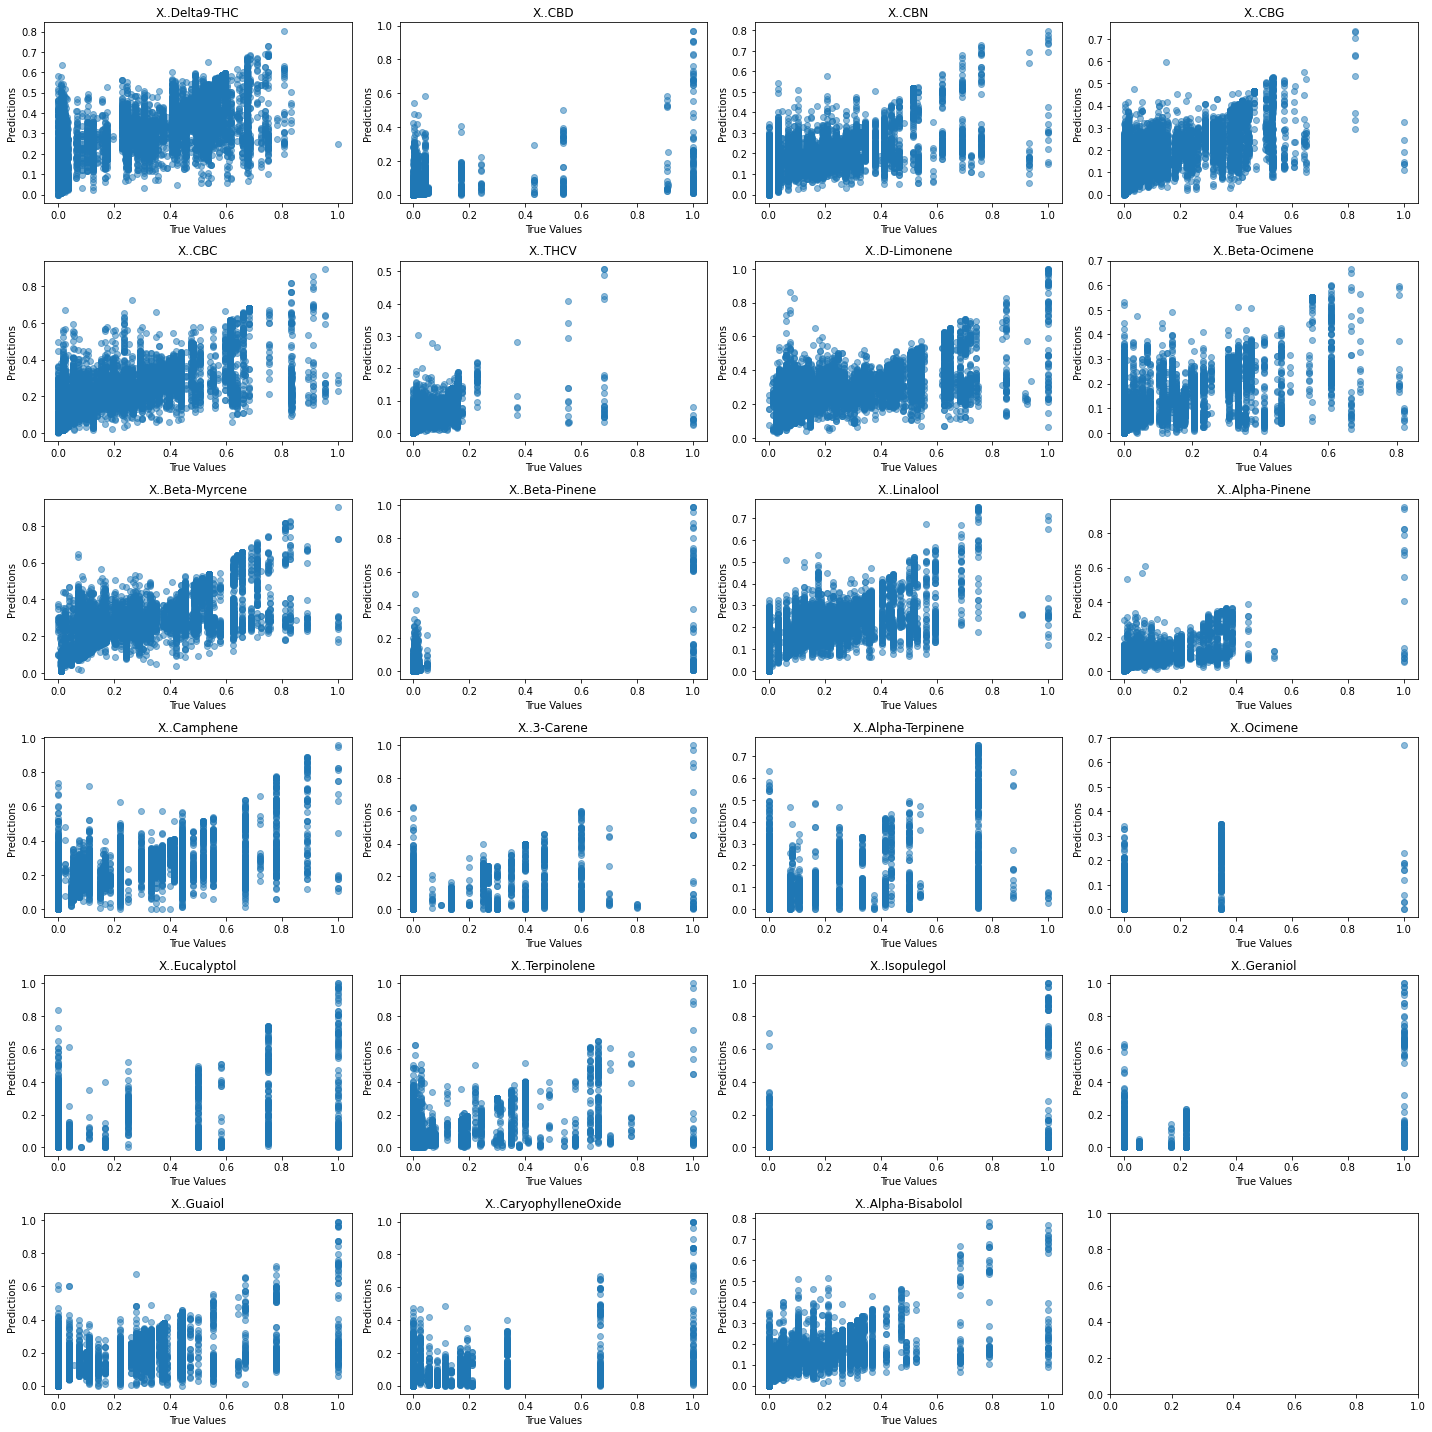

In [66]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

for i, column in enumerate(y_test.columns):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(y_test.iloc[:, i], y_pred_rfreg_test[:, i], alpha=0.5)
    axs[row, col].set_xlabel('True Values')
    axs[row, col].set_ylabel('Predictions')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

Pearson R

In [67]:
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_rfreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    print(f"Target {i}: Pearson correlation coefficient={r_i}, p-value={p_i}")

Target 0: Pearson correlation coefficient=0.6145703541299827, p-value=0.0
Target 1: Pearson correlation coefficient=0.480435487025743, p-value=0.0
Target 2: Pearson correlation coefficient=0.5965027807854453, p-value=0.0
Target 3: Pearson correlation coefficient=0.6267521869703759, p-value=0.0
Target 4: Pearson correlation coefficient=0.5807135311846965, p-value=0.0
Target 5: Pearson correlation coefficient=0.5323620365017945, p-value=0.0
Target 6: Pearson correlation coefficient=0.6014047831204739, p-value=0.0
Target 7: Pearson correlation coefficient=0.6720229182959473, p-value=0.0
Target 8: Pearson correlation coefficient=0.5949935669182852, p-value=0.0
Target 9: Pearson correlation coefficient=0.5953970935508275, p-value=0.0
Target 10: Pearson correlation coefficient=0.6007675273560749, p-value=0.0
Target 11: Pearson correlation coefficient=0.6538861622793264, p-value=0.0
Target 12: Pearson correlation coefficient=0.6071585498541344, p-value=0.0
Target 13: Pearson correlation coeff

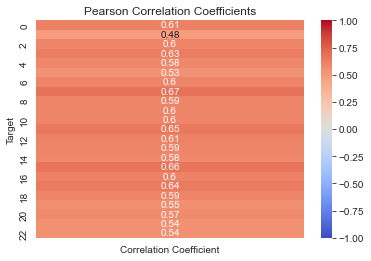

In [68]:
import seaborn as sns

results = []
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_rfreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    results.append({
        'Target': i,
        'Correlation Coefficient': r_i,
        'P-value': p_i
    })

df = pd.DataFrame(results)

sns.set_style("whitegrid")
corr_heatmap = sns.heatmap(df.pivot_table(index='Target', columns=None, values='Correlation Coefficient'),
                           annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
corr_heatmap.set_title('Pearson Correlation Coefficients')

plt.savefig('books_read.png')